In [1]:
# 환자의 치료 전과 후를 비교하여 효과성을 평가하는 코드 실습 
# 데이터 -> 랜덤 더미 데이터

import numpy as np 
import pandas as pd 
from scipy.stats import wilcoxon

## 치료 전, 후 데이터 랜덤하게 생성 

In [2]:
pre_treatment = np.random.randint(1,10, size=20)
post_treatment = pre_treatment + np.random.randint(-3,4, size=20)

# 데이터 프레임 
data  = pd.DataFrame({
    "pre_treatment" : pre_treatment,
    "post_treatment" : post_treatment
})

print(data)
data.to_csv("./data/treatment_data.csv", index=False, encoding='utf-8')

    pre_treatment  post_treatment
0               6               9
1               2               4
2               7               7
3               5               3
4               7               7
5               7               5
6               6               4
7               7               6
8               5               7
9               8               6
10              1               2
11              9               7
12              4               5
13              9              12
14              3               1
15              1               4
16              3               5
17              8               8
18              4               7
19              7               7


## 환자의 치료 전과 후를 비교하여 효과성 평가 

In [3]:
# data 가져오기
data = pd.read_csv("./data/treatment_data.csv")

# 월콕슨 부호 순위 검정 수행 
stat, p = wilcoxon(data['pre_treatment'], data['post_treatment'])

print(stat, p)

50.0 0.3409308475905731


C:\Users\ljh29\anaconda3\envs\AI\lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [4]:
if p > 0.05 : 
    print("fail to reject HO")
else : 
    print("reject HO")

fail to reject HO


### 결과 값을 시각화 

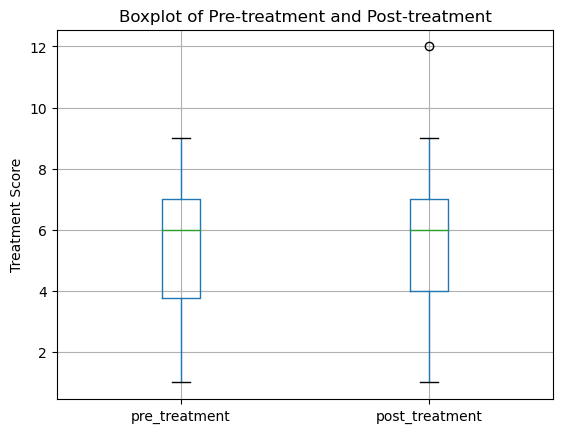

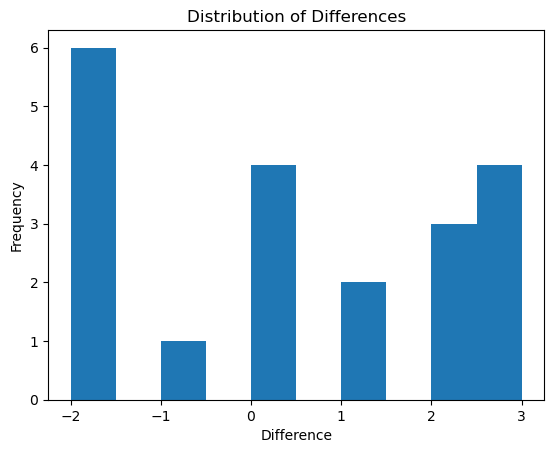

In [5]:
import matplotlib.pyplot as plt

# boxplot 그리기
fig, ax = plt.subplots()
data.boxplot(['pre_treatment', 'post_treatment'], ax=ax)
ax.set_title('Boxplot of Pre-treatment and Post-treatment')
ax.set_ylabel('Treatment Score')
plt.show()

# 두 변수의 차이에 대한 분포를 시각화
fig, ax = plt.subplots()
data['diff'] = data['post_treatment'] - data['pre_treatment']
ax.hist(data['diff'], bins=10)
ax.set_title('Distribution of Differences')
ax.set_xlabel('Difference')
ax.set_ylabel('Frequency')
plt.show()